In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_theme(style="darkgrid")



Lien de téléchargement


https://www.kaggle.com/ealaxi/paysim1?select=PS_20174392719_1491204439457_log.csv

Nous pouvons également afficher les 5 premières lignes de l'ensemble de données


In [3]:
data = pd.read_csv("sampled_aml_df_3.csv")
data

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1577509,155,CASH_OUT,427818.23,C1431817875,198219.00,0.00,C2131020093,0.00,427818.23,0,0
1,3869859,283,CASH_IN,68154.77,C397915380,2884459.21,2952613.98,C105277746,1030035.29,961880.52,0,0
2,5516324,380,CASH_OUT,80828.54,C809484944,0.00,0.00,C226553176,5149991.49,5230820.04,0,0
3,5490462,380,TRANSFER,106069.89,C1857104283,301258.00,195188.11,C1759851095,263816.83,369886.72,0,0
4,5606765,394,PAYMENT,34530.86,C1774638089,200755.00,166224.14,M1074240731,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192495,1030778,92,CASH_OUT,19742.71,C931340371,19742.71,0.00,C781083195,2098671.68,2118414.39,1,0
192496,5994750,422,CASH_OUT,298365.86,C1916355655,298365.86,0.00,C1396514823,0.00,298365.86,1,0
192497,6291211,662,TRANSFER,1468304.35,C151325855,1468304.35,0.00,C1135260060,0.00,0.00,1,0
192498,4388551,314,CASH_OUT,2984434.36,C1499429209,2984434.36,0.00,C1399829166,5498919.48,8483353.84,1,0


On peut voir que les données comprennent des enregistrements et pour chaque enregistrement, nous avons les attributs de la transaction.

**description des variale**O

- index: utilisées pour identifier de manière unique les enregistrements  
- step : étape
- type : le type de transaction
- amount : le montant
- nameOrigine: l'origine de la transaction
- nameDest: la destination de la transaction
- 

La forme de l'ensemble de données 

In [4]:
data.shape

(192500, 12)

Nous avons un grand nombre d'enregistrement soit:
- 192 500 lignes et 12 colonnes  

**Description des variables**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192500 entries, 0 to 192499
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           192500 non-null  int64  
 1   step            192500 non-null  int64  
 2   type            192500 non-null  object 
 3   amount          192500 non-null  float64
 4   nameOrig        192500 non-null  object 
 5   oldbalanceOrg   192500 non-null  float64
 6   newbalanceOrig  192500 non-null  float64
 7   nameDest        192500 non-null  object 
 8   oldbalanceDest  192500 non-null  float64
 9   newbalanceDest  192500 non-null  float64
 10  isFraud         192500 non-null  int64  
 11  isFlaggedFraud  192500 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 17.6+ MB


On voit que nous avons des variables quantitatives continues, discrètes et les variables de type Object

**Vérifions la présence des valeurs manquantes**

In [6]:
data.isnull().sum()

index             0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Nous disposons d'un ensemble de données propre avec absolument aucune valeur manquante

In [14]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,192500.000000,1.925000e+05,1.925000e+05,1.925000e+05,1.925000e+05,1.925000e+05,192500.000000,192500.000000
mean,247.825377,2.261676e+05,8.616604e+05,8.270867e+05,1.084274e+06,1.230771e+06,0.038961,0.000083
std,147.685363,7.720697e+05,2.912266e+06,2.887263e+06,3.297716e+06,3.575349e+06,0.193503,0.009116
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.401661e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,249.000000,8.060089e+04,1.696019e+04,0.000000e+00,1.144710e+05,2.091728e+05,0.000000,0.000000
75%,347.000000,2.188217e+05,1.336372e+05,1.290969e+05,9.127214e+05,1.115385e+06,0.000000,0.000000
max,743.000000,6.988673e+07,5.958504e+07,4.958504e+07,2.511150e+08,2.506381e+08,1.000000,1.000000


**Analyse univarié**

In [7]:
data['nameDest'].nunique
# nameDest contient l'identifiant de la personne qui a reçu le montant de la transaction


168929

Nous avons un total de 168.000 noms à peu près uniques

In [9]:
data['nameOrig'].nunique()
# nameOrig contient l'identifiant de la personne qui a transféré le montant de la transaction

192494

On constate égalément que la variable **nameOrig** a un grand nombre de valeur unique

les enregistrement qui ont un grand nombre de valeurs unique n'ont pas beaucoup de pouvoir prédictif

In [10]:
# suppression de trois colonnes
data = data.drop(labels = ['index', 'nameOrig', 'nameDest'], axis=1)

data.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
56170,490,CASH_OUT,148781.02,0.00,0.00,154883.35,303664.37,0,0
35567,39,CASH_IN,118704.14,1282790.91,1401495.06,1204447.06,1085742.91,0,0
43204,588,CASH_OUT,98486.25,0.00,0.00,569438.48,667924.73,0,0
65605,134,CASH_OUT,108289.80,0.00,0.00,1479577.37,1587867.18,0,0
135272,201,CASH_OUT,395955.74,94138.00,0.00,210388.10,606343.85,0,0


**Déterminons le nombre de transaction frauduleuse**

**NB**

- 0 : Non frauduleux
- 1 : Frauduleux

In [12]:
data['isFraud'].value_counts()

0    185000
1      7500
Name: isFraud, dtype: int64

Le résultat nous montre que nous disposons d'un ensemble de données très asymétrique. Sur environ 192 000 enregistrements seuls **7 500** ont été étiquetés comme **frauduleux**

**Visualisation**

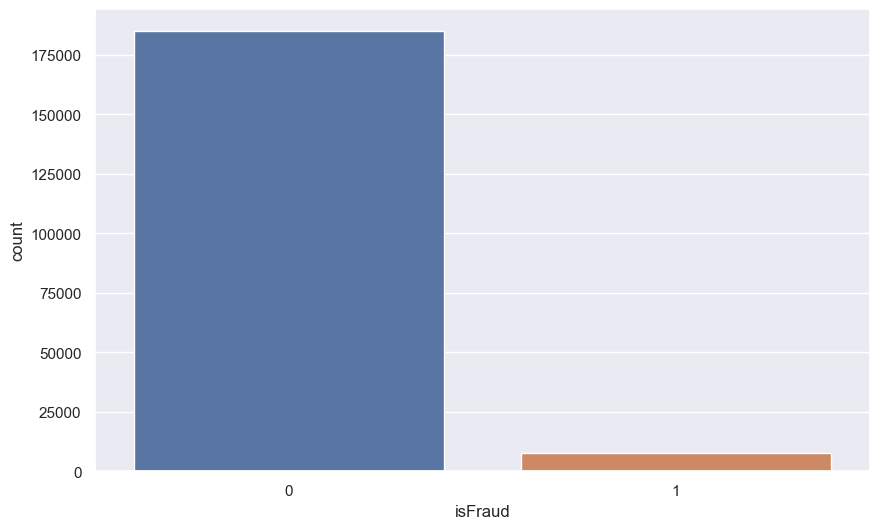

In [13]:
plt.figure(figsize = (10, 6))

sns.countplot(x='isFraud', data = data);